![](http://thecads.org/wp-content/uploads/2017/02/adax_logo.jpg)
# Module 4: Machine Learning Algorithms

In this module, we look at an array of machine learning algorithms, or techniques (for both regression and classification) that are commonly used by data scientists to perform predictive analytics.
1. k-Nearest Neighbor (kNN)
2. Softmax Regression
3. Naive Bayes
4. Support Vector Machine (SVM)
5. Decision Trees

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1. k-Nearest Neighbor (kNN)

The k-NN algorithm is arguably the simplest machine learning algorithm. Building the model consists only of storing the training dataset. To make a prediction for a new data point, the algorithm simply finds the closest data point(s) in the training dataset, basically its *nearest neighbors*. What we do after that, depends whether we are performing a classification or regression task.

### kNN Classification

In its simplest version, the kNN algorithm only considers exactly one nearest neighbor, which is the closest training data point to the point we want to make a prediction for. The prediction is then simply the known output for this training point. In other words, the class of the label is predicted as the class of its closest neighbor.

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# build the model
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

training_accuracy = clf.score(X_train, y_train)   # record training set accuracy  
test_accuracy = clf.score(X_test, y_test)         # record generalization accuracy

print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

What does the difference in training and test accuracy (or sometimes known as *generalization accuracy*) indicate?

Instead of considering only the closest neighbor, we can also consider an arbitrary number, *k* of neighbors. This is where the *k* in the name *k*-nearest neighbor comes from. When considering more than one neighbor, a "voting" strategy is used to assign the label. That means, for each test point, we count how many neighbors belong to each class. Then, we assign it to the class that occured most frequently among its neighbors; in other words, the *majority class*. In cases where a tie is needed to be broken, the typical remedy is to decrease *k* (gradually) to arrive at a matched class.

Let's have a look at the correlation between the first feature (mean radius) and all other features.

In [ ]:
np.c_?

In [ ]:
cancer

In [ ]:
import seaborn as sns
pd.set_option('display.max_columns', 40)

df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

# show the whole correlation heatmap
ax = sns.heatmap(df.corr())
plt.show()

dfc = df.corr()
dfc[0:2]  # look at the first two row: correlation between mean radius and other features

Let's pick two good features to perform classification (no guarantee it will be better than using all 30 features. Just for exercise!).

"**Mean concave points**" feature is highly correlated with "**mean radius**". Let's choose these two as features.

To plot the scatter plot of these two features, we can either opt for the *matplotlib* way or the *seaborn* way. We shall have the opportunity to try them both. 

In [ ]:
### matplotlib way

# specify training data as arrays
#X1 = X_train[:,0]  # mean radius
#X2 = X_train[:,7]  # mean concave points
#y = y_train
#classes = list(set(y))
#fig, ax = plt.subplots()
#sc = ax.scatter(X1, X2, c=y, cmap='viridis', edgecolors='grey', label=classes)

### seaborn way

# put training data back into dataframe
df_train = pd.DataFrame(X_train, columns=cancer['feature_names'])
df_train['target'] = pd.Series(y_train)

grid = sns.pairplot(x_vars="mean radius", y_vars="mean concave points", data=df_train, hue="target", palette="hls", 
                    size=5, aspect=1.5)

In [ ]:
df_train.head()

In [ ]:
### matplotlib way

# specify training data as arrays
X1 = X_train[:,0]  # mean radius
X2 = X_train[:,7]  # mean concave points
y = y_train
classes = list(set(y))
fig, ax = plt.subplots()
sc = ax.scatter(X1, X2, c=y, cmap='viridis', edgecolors='grey', label=classes)

There are some separation between data points from both classes. However, it gets a bit muddled at the center, with both classes' distributions overlapping slightly. Most model-based classification methods attempt to find a finite set of parameters or coefficients, hence they are also known as *parametric* methods. KNN is a non-parametric method because we don't have an objective function that we aim at minimizing or maximizing, hence it relies on some algorithmic rules to perform classification. 

Let's get a sample test data point and see its predicted label, and where it lies in the scatter plot.

In [ ]:
# Just use the first point (index 0) from the test set
newpoint = X_test[0,:].reshape(1, -1)  # recall: reshape needed to extend a 1D array to a 2D array of 1xN features
print("Actual label: ", y_test[0])
print("Predicted label: ", int(clf.predict(newpoint)))

In [ ]:
print(X_test[0,:])
print()
print(newpoint)

In [ ]:
### matplotlib way
#X1_new = X_test[0,0]
#X2_new = X_test[0,7]
#ax.scatter(X1_new, X2_new, c='r')
#fig

### seaborn way -- this is a bit more complex

# get the single test new data sample, construct df, concatenate with training df
X_one = X_test[0,:].reshape(1, -1)
y_one = y_test[0]
df_test = pd.DataFrame(X_one, columns=cancer['feature_names'])       # dataframe of a single row of data!
df_test['target'] = ['new data']                                     # give it an unknown label like 'new data' 
full_ds = pd.concat([df_train, df_test])                             # concat that single row to the training df
#print(full_ds)                                                       # inspect the df's last row...

grid = sns.pairplot(x_vars="mean radius", y_vars="mean concave points", data=full_ds, hue="target", hue_order=[0, 1, "new data"],
                    size=5, aspect=1.5)

# inspect closer -- who are the neighbors??
#plt.xlim(12, 14)
#plt.ylim(0.018, 0.03)

In [ ]:
grid = sns.pairplot(x_vars="mean radius", y_vars="mean concave points", data=full_ds, hue="target", hue_order=[0, 1, "new data"],
                    size=5, aspect=1.5)

plt.xlim(12, 14)
plt.ylim(0.018, 0.03)

What we have used earlier are all 30 features. Let's revisit the 2 features we chose earlier for scatter analyis and use them as the only features for kNN classification. This way, we can try to visualize the "decision boundary" that separates the two classes.

In [ ]:
# re-train classifier using only these two features. Use the same train-test split

# re-form data to only have the 2 features (mean radius at index 0, mean concave points at index 7)
X_train2 = X_train[:,[0, 7]]
X_test2 = X_test[:,[0, 7]]
y = y_train

# build another model                   
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train2, y_train)

# record the accuracy
training_accuracy = clf2.score(X_train2, y_train)
test_accuracy = clf2.score(X_test2, y_test)
    
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

classes = list(set(y))
fig, axes = plt.subplots()
sc = axes.scatter(X_train2[:,0], X_train2[:,1], c=y, cmap='jet', edgecolors='grey')

Here's a function `plot_2d_classification` that takes a classifier and plots the decision boundary that has been learned from training data.

In [ ]:
def plot_2d_classification(classifier, X, ax=None, eps=None, alpha=1, cm='jet'):
    
    # get eps values automatically from distribution of feature values
    if eps is None:
        eps0 = X[:,0].std() / 2
        eps1 = X[:,1].std() / 2
    else:
        eps0, eps1 = eps

    # if no axes defined, get current axes
    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps0, X[:, 0].max() + eps0
    y_min, y_max = X[:, 1].min() - eps1, X[:, 1].max() + eps1
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

plot_2d_classification(clf2, X_train2, ax=axes, alpha=.4)           # plots on top of the previous axes containing points
axes.set_xlabel("feature 0")
axes.set_ylabel("feature 7")
fig

Data normalization is a common pre-processing method to ensure that all data are lie on a similar scale, or can be normalized to produce 

In [ ]:
# re-do everything, this time normalizing data before splitting data and classification
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

# Important: normalize data - many ways of doing this
  
data_norm = StandardScaler().fit_transform(cancer.data) # Standardization (or z-score norm.) 
                                                        # remove mean, scale by std dev
#data_norm = MinMaxScaler().fit_transform(cancer.data)  # Minmax scaling. Scale to range [min max]
#data_norm = normalize(cancer.data, axis=1)              # Normalization. Scaling individual samples to have unit norm
            # normalize data -- axis 1 is the columns, normalize each sample data
            # normalize features -- axis 0 is the rows, normalize each feature

# train test split
X_train_norm, X_test_norm, y_train, y_test = train_test_split(data_norm, 
                                                              cancer.target, 
                                                              stratify=cancer.target, 
                                                              random_state=66)

# re-form data to only have the 2 features
X_train2n = X_train_norm[:,[0, 7]]
X_test2n = X_test_norm[:,[0, 7]]

# build another model                   
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train2n, y_train)

# record the accuracy
training_accuracy = clf2.score(X_train2n, y_train)
test_accuracy = clf2.score(X_test2n, y_test)
    
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

#classes = list(set(y))
fig, axes = plt.subplots()
sc = axes.scatter(X_train2n[:,0], X_train2n[:,1], c=y_train, cmap='jet', edgecolors='grey')

plot_2d_classification(clf2, X_train2n, ax=axes, alpha=.4)
axes.set_xlabel("feature 0")
axes.set_ylabel("feature 7")

# give some ticks to show the range where the data resides
axes.set_xticks((X_train2n[:,0].min(), X_train2n[:,0].max()))
axes.set_yticks((X_train2n[:,1].min(), X_train2n[:,1].max()))

In [ ]:
# re-do everything, this time normalizing data before splitting data and classification
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

# Important: normalize data - many ways of doing this
  
#data_norm = StandardScaler().fit_transform(cancer.data) # Standardization (or z-score norm.) remove mean, scale by std dev
data_norm1 = MinMaxScaler().fit_transform(cancer.data)  # Minmax scaling. Scale to range [min max]
#data_norm = normalize(cancer.data, axis=1)              # Normalization. Scaling individual samples to have unit norm
            # normalize data -- axis 1 is the columns, normalize each sample data
            # normalize features -- axis 0 is the rows, normalize each feature

# train test split
X_train_norm, X_test_norm, y_train, y_test = train_test_split(data_norm1, cancer.target, stratify=cancer.target, random_state=66)

# re-form data to only have the 2 features
X_train2n = X_train_norm[:,[0, 7]]
X_test2n = X_test_norm[:,[0, 7]]

# build another model                   
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train2n, y_train)

# record the accuracy
training_accuracy = clf2.score(X_train2n, y_train)
test_accuracy = clf2.score(X_test2n, y_test)
    
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

#classes = list(set(y))
fig, axes = plt.subplots()
sc = axes.scatter(X_train2n[:,0], X_train2n[:,1], c=y_train, cmap='jet', edgecolors='grey')

plot_2d_classification(clf2, X_train2n, ax=axes, alpha=.4)
axes.set_xlabel("feature 0")
axes.set_ylabel("feature 7")

# give some ticks to show the range where the data resides
axes.set_xticks((X_train2n[:,0].min(), X_train2n[:,0].max()))
axes.set_yticks((X_train2n[:,1].min(), X_train2n[:,1].max()))

In [ ]:
# re-do everything, this time normalizing data before splitting data and classification
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

# Important: normalize data - many ways of doing this
  
#data_norm = StandardScaler().fit_transform(cancer.data) # Standardization (or z-score norm.) remove mean, scale by std dev
#data_norm = MinMaxScaler().fit_transform(cancer.data)  # Minmax scaling. Scale to range [min max]
data_norm2 = normalize(cancer.data, axis=1)              # Normalization. Scaling individual samples to have unit norm
            # normalize data -- axis 1 is the columns, normalize each sample data
            # normalize features -- axis 0 is the rows, normalize each feature

# train test split
X_train_norm, X_test_norm, y_train, y_test = train_test_split(data_norm2, 
                                                              cancer.target, 
                                                              stratify=cancer.target, 
                                                              random_state=66)

# re-form data to only have the 2 features
X_train2n = X_train_norm[:,[0, 7]]
X_test2n = X_test_norm[:,[0, 7]]

# build another model                   
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train2n, y_train)

# record the accuracy
training_accuracy = clf2.score(X_train2n, y_train)
test_accuracy = clf2.score(X_test2n, y_test)
    
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

#classes = list(set(y))
fig, axes = plt.subplots()
sc = axes.scatter(X_train2n[:,0], X_train2n[:,1], c=y_train, cmap='jet', edgecolors='grey')

plot_2d_classification(clf2, X_train2n, ax=axes, alpha=.4)
axes.set_xlabel("feature 0")
axes.set_ylabel("feature 7")

# give some ticks to show the range where the data resides
axes.set_xticks((X_train2n[:,0].min(), X_train2n[:,0].max()))
axes.set_yticks((X_train2n[:,1].min(), X_train2n[:,1].max()))

In [ ]:
# re-do everything, this time normalizing data before splitting data and classification
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler

# Important: normalize data - many ways of doing this
  
#data_norm = StandardScaler().fit_transform(cancer.data) # Standardization (or z-score norm.) remove mean, scale by std dev
#data_norm = MinMaxScaler().fit_transform(cancer.data)  # Minmax scaling. Scale to range [min max]
data_norm4 = normalize(cancer.data, axis=0)              # Normalization. Scaling individual samples to have unit norm
            # normalize data -- axis 1 is the columns, normalize each sample data
            # normalize features -- axis 0 is the rows, normalize each feature

# train test split
X_train_norm, X_test_norm, y_train, y_test = train_test_split(data_norm4, 
                                                              cancer.target, 
                                                              stratify=cancer.target, 
                                                              random_state=66)

# re-form data to only have the 2 features
X_train2n = X_train_norm[:,[0, 7]]
X_test2n = X_test_norm[:,[0, 7]]

# build another model                   
clf2 = KNeighborsClassifier(n_neighbors=3)
clf2.fit(X_train2n, y_train)

# record the accuracy
training_accuracy = clf2.score(X_train2n, y_train)
test_accuracy = clf2.score(X_test2n, y_test)
    
print("Training Accuracy: ", training_accuracy)
print("Test Accuracy: ", test_accuracy)

#classes = list(set(y))
fig, axes = plt.subplots()
sc = axes.scatter(X_train2n[:,0], X_train2n[:,1], c=y_train, cmap='jet', edgecolors='grey')

plot_2d_classification(clf2, X_train2n, ax=axes, alpha=.4)
axes.set_xlabel("feature 0")
axes.set_ylabel("feature 7")

# give some ticks to show the range where the data resides
axes.set_xticks((X_train2n[:,0].min(), X_train2n[:,0].max()))
axes.set_yticks((X_train2n[:,1].min(), X_train2n[:,1].max()))

Did normalization of features helped improve the overall performance of the kNN classifier?

**Note**: Understand the differences between the three types of normalization - Normalization by unit norm, Standardization (or z-score normalization) and Scaling.

Consider using more neighbors in kNN algorithm. Will you get a "smoother" decision boundary? What is the impact of using more neighbors to the classification performance?

**Q1**: What is the connection between model complexity (number of neighbors considered in computation) and the model's generalization capability (test classification performance)? *Hint: plot both training accuracy and test accuracy against number of neighbors.*

In [ ]:
# Write your code here


### kNN Regressor

There is also a regression variant for the k-nearest neighbor algorithm. The prediction using a single neighbor is just the target value of the nearest neighbor. If k number of neighbors are used, the prediction is the average, or mean, of the neighbor values. Let's go back to the housing prices example, to try this.

In [1]:
house = pd.read_csv("housing.csv")
house.head()

#house.corr()

NameError: name 'pd' is not defined

In [ ]:
house[house['total_rooms'].isnull() == True]

In [ ]:
X = house.iloc[:, 7].values.reshape(-1, 1)        # feature: median income
y = house.iloc[:, 8].values.reshape(-1, 1)        # target value: median_house_value

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

from sklearn.neighbors import KNeighborsRegressor
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

fig, axes = plt.subplots()
sc = axes.scatter(X_train, y_train, cmap='jet', edgecolors='grey')

In [ ]:
print("Test set predictions:\n{}".format(reg.predict(X_test)))

We can also evaluate the model using the `score` method, which for regressors return the $R^2$ score. The $R^2$ score, also known as the *coefficient of determination*, is a measure of goodness of a prediction for a regression model, and yields a score between 0 and 1. A value of 1 corresponds to a perfect prediction, and a value of 0 corresponds to a constant model that just predicts the mean of the training set responses.

In [ ]:
print("Training set R^2: {:.2f}".format(reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

You should get somewhere around 0.3 for the test set. The model fitting is not that good actually. 

To visualize how the regressor fits to the data (remember, there's no "model" in this method), we create synthetic test dataset consisting of about 1,000 data points, evenly spaced between the min and max of the selected feature. This allows us to look in detail at how the regression fit looks like.   

In [ ]:
# create 1,000 data points, evenly spaced between the min and max of the feature selected
minf = np.min(X) 
maxf = np.max(X)
line = np.linspace(minf, maxf, 1000).reshape(-1, 1)



In [ ]:
# by increasing the number of neighbours

minf = np.min(X) 
maxf = np.max(X)
line = np.linspace(minf, maxf, 1000).reshape(-1, 1)



Perhaps...
* We can try with more neighbors?
* We can try with more features (than just a single feature)?

Experimentally, how would you figure these out?

In [ ]:
train_acc_all2 = []
test_acc_all2 = []
K_max = 50
for k in range(1,K_max):
    reg2 = KNeighborsRegressor(n_neighbors=k)
    reg2.fit(X_train, y_train)
    
    train_acc_all2.append(reg2.score(X_train,y_train)) # the X_train2n data is normalized data. See previous codes
    test_acc_all2.append(reg2.score(X_test,y_test))    # go for 75% split in train_test_split(test_size=0.75)
                                                        # see what happens then
plt.figure(figsize=(8,4))
plt.plot(range(1,K_max), train_acc_all2, 'b-')
plt.plot(range(1,K_max), test_acc_all2, 'r-')
plt.xlabel("# of neighbours")
plt.ylabel("accuracy")
plt.show()

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X2 = house.iloc[:, [3,7]].values.reshape(-1, 2)        # feature: median income
y2 = house.iloc[:, 8].values.reshape(-1, 1)        # target value: median_house_value

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=0)

train_acc_all2 = []
test_acc_all2 = []
K_max = 25
for k in range(1,K_max):
    reg2 = KNeighborsRegressor(n_neighbors=k)
    reg2.fit(X_train2, y_train2)
    
    train_acc_all2.append(reg2.score(X_train2,y_train2)) # the X_train2n data is normalized data. See previous codes
    test_acc_all2.append(reg2.score(X_test2,y_test2))    # go for 75% split in train_test_split(test_size=0.75)
                                                        # see what happens then
plt.figure(figsize=(8,4))
plt.plot(range(1,K_max), train_acc_all2, 'b-')
plt.plot(range(1,K_max), test_acc_all2, 'r-')
plt.xlabel("# of neighbours")
plt.ylabel("accuracy")
plt.show()

In [ ]:
print(X2.shape)
print(y2.shape)

In [ ]:
reg?

There are two important parameters to the `KNeighborsRegressor` classifier: the number of neighbors and how you measure the distance between data points. Choosing the right distance measure is somewhat beyond the scope of our lesson; we can stick to Euclidean distance (with `p` set to 2), which works well in most cases. As for the number of neighbors, increasing this will result in "smoother" predictions, but it may not necessarily fit the training data well. On the other hand, using `n_neighbors=1` usually means predicted values will go through all of the data points -- too overly fitting.

#### Strengths / Weakneses of the k-Nearest Neighbor algorithm

One of the strengths of kNN is that the model is easy to understand, and gives a reasonable performance without too much adjustments or optimizations required. It serves as a good baseline method to consider before moving to more advanced techniques. 

An obvious weakness is in its speed. Its prediction can be quite slow if your training dataset is very large (either in number of samples or number of features). It also performs poorly on data with many features (hundreds or more) and data where most features are 0 most of the time (sparse datasets). Certainly, these drawbacks can be quite problematic in the real world, which makes kNN less than desirable.

Watch this for some extra insight.
https://www.youtube.com/watch?v=GbhZcvPLbQg

## 2. Revisiting Logistic Regression

In [ ]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

iris = datasets.load_iris()
list(iris.keys())

X = iris["data"][:, 3:] # petal width
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23)

log_reg = LogisticRegression()
print(log_reg)    # default: multi_class='ovr', C=1.0
# basically ovr = one vs. the rest. If changed to "multinomial"
log_reg.fit(X_train, y_train)

# Predict bunch of points within the range of 0 to 3 petal width, and get their predicted probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_new_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_new_proba[:, 0], 'b-')
plt.plot(X_new, y_new_proba[:, 1], 'r-')
plt.plot(X_new, y_new_proba[:, 2], 'g-')

# Predict test data
fig = plt.figure(figsize=(16,2))
counter = range(0,len(y_test))
y_test_proba = log_reg.predict_proba(X_test)
plt.plot(counter, np.argmax(y_test_proba, axis=1), 'r^')   # red up arrows indicate predicted classes
plt.plot(counter, y_test, 'bv')                            # blue down arrows indicate ground truth
print("Accuracy: ",log_reg.score(X_test, y_test))


# this is a multi class classification

In [ ]:
iris["data"][:, 3:]

In [ ]:
iris["target"]

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
print(log_reg)    # default: multi_class='ovr', C=1.0
# basically ovr = one vs. the rest. If changed to "multinomial"
log_reg.fit(X_train, y_train)

# Predict bunch of points within the range of 0 to 3 petal width, and get their predicted probabilities
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_new_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_new_proba[:, 0], 'b-')
plt.plot(X_new, y_new_proba[:, 1], 'r-')
plt.plot(X_new, y_new_proba[:, 2], 'g-')

# Predict test data
fig = plt.figure(figsize=(16,2))
counter = range(0,len(y_test))
y_test_proba = log_reg.predict_proba(X_test)
plt.plot(counter, np.argmax(y_test_proba, axis=1), 'r^')   # red up arrows indicate predicted classes
plt.plot(counter, y_test, 'bv')                            # blue down arrows indicate ground truth
print("Accuracy: ",log_reg.score(X_test, y_test))


# this is a multi class classification
# each line represents the probability of classified into that class.
# the sum of probability is 1.0

By default, the multi-class setting for LogisticRegression is 'ovr' or "One-versus-Rest", which basically returns the predicted probabilities of all three models (class 0 vs. the rest, class 1 vs. the rest, and class 2 vs. the rest). As you can see, the predicted probabilities of all three models near the middle range of petal widths (around 1.0) are a bit ambiguous. You can see a number of test samples that have been confused for class 2 (red arrow) instead of class 1 (blue arrow)

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers (such as KNNs and SVMs as we shall see later). This is called a *Softmax Regression* or *Multinomial Logistic Regression*.

Given an instance $\textbf{x}$, the Softmax Regression model first computes a score $s_k(\textbf{x})$ for each class $k$, then estimates the probability of each class by applying the *softmax* function (or normalized exponential) to the scores. The equation to compute $s_k(\textbf{x})$ is familiar to you...
\begin{align}
    s_k(\textbf{x}) = w_k^T\cdot\textbf{x}
\end{align}
Note that each class has its own set of coefficients $w_k$. Once the score of every class is computed for the instance $\textbf{x}$, we can estimate the probability $p$ that the instance belongs to class $k$ by running the scores through the softmax function:
\begin{align}
    p_k = \sigma(s(\textbf{x}))_k = \frac{\text{exp}(s_k(\textbf{x})}{\sum_{j=1}^{K}\text{exp}(s_j(\textbf{x}))}
\end{align}
where $K$ is the number of classes, $s(\textbf{x})$ is the vector containing the scores of each class for the instance $\textbf{x}$ and $\sigma(s(\textbf{x}))_k$ is the estimated probability that the instance $\textbf{x}$ belongs to class $k$ given the scores of each class for that instance.

To predict the class, the Softmax Regression model predicts the class with the highest estimated probability:
\begin{align}
    y = \arg \max_k \sigma(s(\textbf{x}))_k = \arg \max_k s_k(\textbf{x}) = \arg \max_k (w_k^T\cdot \textbf{x})
\end{align}
The *argmax* operator returns the value of a variable that maximizes a function. In this equation, it returns the value of $k$ that maximizes the estimated probability $\sigma(s(\textbf{x}))_k$. 

We need to train the model to estimate a high probability for the target class and vice versa. Hence, the suitable cost function is called the *cross entropy*, which measures how well a set of estimat_ed class probabilities match the target classespenalizes a model when it estimates a low probability for a target class and vice versa.
\begin{align}
    J(w) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)} log (p_k^{(i)})
\end{align}
And, the gradient of this cost function with regards to $w_k$:
\begin{align}
    \nabla_{w_k} J(w) = \frac{1}{m}\sum_{i=1}^m (p_k^{(i)}-y_k^{(i)})\textbf{x}^{(i)}
\end{align}
Following this, we can perform gradient descent to find the set of parameters $\textbf{w}$ that minimizes the cost function.

For some extra notes, refer to: https://www.youtube.com/watch?v=LLux1SW--oM

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')

You can repeat the rest of the process as before. 

After which, you can also repeat with more features, using both petal length and petal width:

In [ ]:
X = iris["data"][:, (2, 3)]
y = iris['target']

Let's use back the 2D plot to see how softmax regression finds the decision boundaries between the three iris classes.

In [ ]:
X = iris["data"][:, (2, 3)]
y = iris['target']

## Write your codes here for softmax regression

In [ ]:
#using the standard logistic regression

## Write your codes here

## 3. Naive Bayes Classifier

Naive Bayes classifiers are a family of classifiers that are quite similar to the linear models discussed earlier and in previous modules. However, they tend to be even faster in training. The price paid for this efficiency is that naive Bayes models often provide generalization performance that is slightly worse than that of linear classifiers like
`LogisticRegression` and `LinearSVC`. The reason that Naive Bayes models are so efficient is that they learn parameters by
looking at each feature individually and collect simple per-class statistics from each feature.

There are three kinds of naive Bayes classifiers implemented in scikit-learn: `GaussianNB`, `BernoulliNB`, and `MultinomialNB`. `GaussianNB` can the most universal, and can be applied to any continuous data, while `BernoulliNB` assumes binary data and `MultinomialNB` assumes count data (that is, that each feature represents an integer count of something, like how often a word appears in a sentence). `BernoulliNB` and `MultinomialNB` are mostly used in text data classification.

In [ ]:
from sklearn.naive_bayes import GaussianNB

iris = datasets.load_iris()
X = iris["data"]
y = iris["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=23)

clf_nb = GaussianNB()
clf_nb.fit(X_train, y_train)

print(clf_nb.predict(X_test))

print("Train accuracy: ", clf_nb.score(X_train, y_train))
print("Train accuracy: ", clf_nb.score(X_test, y_test))

Repeat again with only two features, the same two we identified earlier...

In [ ]:
X_train2 = X_train[:, [2, 3]]
X_test2 = X_test[:, [2, 3]]

clf_nb2 = GaussianNB()
clf_nb2.fit(X_train2, y_train)

print("Train accuracy: ", clf_nb2.score(X_train2, y_train))
print("Train accuracy: ", clf_nb2.score(X_test2, y_test))

fig, axes = plt.subplots()
sc = axes.scatter(X_train2[:,0], X_train2[:,1], c=y_train, cmap='jet', edgecolors='grey')

plot_2d_classification(clf_nb2, X_train2, ax=axes, alpha=.4)

## 4. Support Vector Machines (SVM)

Support Vector Machine (SVM) is a very powerful and versatile machine learning algorithm, capable of
performing linear or nonlinear classification, regression, and even outlier detection. It is one of the most
popular models in Machine Learning, and anyone interested in Machine Learning should have it in their
toolbox. SVMs are particularly well suited for classification of complex but small- or medium-sized
datasets. SVMs may struggle computationally with large datasets, but there are fast solvers to help with that as well.

### Linear SVM Classification

The fundamental idea behind SVMs is best explained with some pictures.

![](resources/large-margin-classification.png)

The left plot shows the decision boundaries of three possible linear classifiers. The model whose decision boundary is represented by the dashed line is so bad that it fails to separate the classes properly. The other two models work perfectly on this training set, but their decision boundaries come so close to the instances that these models will probably
not perform as well on new instances. In contrast, the solid line in the plot on the right represents the decision boundary of an SVM classifier; this line not only separates the two classes but also stays as far away from the closest training instances as possible. You can think of an SVM classifier as fitting the widest possible "street" (represented by the parallel dashed lines) between the classes. This is called large margin classification. Think of it as having a "safety buffer" between the two classes just in case we encounter new data that is more ambiguous. The two instances that located at the edge of the "street" are called the *support vectors*.

The linear SVM classifier model predicts the class of a new instance $x$ by computing the decision function $w^T \cdot x + b = w_1 x_1 + \cdots + w_n x_n + b$. If the result is positive, the new predicted class $\hat{y}$ is the positive class (1), else it is the negative class (0).
\begin{align}
    \hat{y} =
    \begin{cases} 
      0 & \text{if } w^T \cdot x + b < 0, \\
      1 & \text{if } w^T \cdot x + b \ge 0 
    \end{cases}
\end{align}

![](resources/svm-feature-scaling.png)

This example shows how important feature scaling is. Since the vertical scale is much larger than the horizontal scale, the widest possible street may be narrow along the larger scaled axis. The decision boundary is much more spaced out after feature scaling is performed (feature scaling can be done by `StandardScaler` in Scikit-Learn)

#### Soft margin classification

Imposing all instances to be off the street and on the right side, is called a *hard margin classification*. There's some issues with this: 1) Works only if data is linearly separable, 2) Sensitive to outliers. The left plot shows data which is linearly not separable, impossible! The right plot shows a margin that is very differently placed which accommodates the outliers but may not generalize well to new instances.

![](resources/hard-margin-issues.png)

What we need is something flexible, that allows us to find a good balance between keeping the street as wide as possible and limiting the margin violations (i.e. instances that end up in the middle of street). This is called *soft margin classification*.

In SVM, we control this using the `C` hyperparameter: 
* Smaller `C` value leads to a wider street but more margin violations (think of: we take in some mistakes for the sake of better generalization later)
* Larger `C` value leads to fewer margin violations but ends up with a smaller margin (think of: let's be strict and get the boundary more correct, but at the expense of a smaller room for error later)

![](resources/hyperparameter-C.png)

Tip: If your SVM model is overfitting the data too tightly, you can try "regularizing" it by reducing `C`.

Train accuracy:  0.964285714286
Test accuracy:  0.947368421053


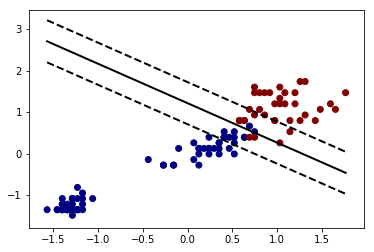

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

iris = load_iris()

X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # set the target class as Iris-Virginica

svm_clf = Pipeline((
("scaler", StandardScaler()),
#("linear_svc", SVC(C=1, kernel='linear')),
("linear_svc", LinearSVC(C=1, loss="hinge")),
))

# as usual, do the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y, 
                                                    random_state=11)

svm_clf.fit(X_train, y_train)

print("Train accuracy: ",svm_clf.score(X_train, y_train))
print("Test accuracy: ",svm_clf.score(X_test, y_test))

X_train = StandardScaler().fit_transform(X_train)    # manually scale it for purpose of plotting

def plot_svc_decision_boundary(svm_clf, ax, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    # only runnable if using SVC and not LinearSVC
    #svs = svm_clf.support_vectors_
    #ax.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='white', edgecolors='grey')
    
    ax.plot(x0, decision_boundary, "k-", linewidth=2)
    ax.plot(x0, gutter_up, "k--", linewidth=2)
    ax.plot(x0, gutter_down, "k--", linewidth=2)
  
fig, axsvm = plt.subplots()
clf = svm_clf.steps[1][1]
plot_svc_decision_boundary(clf, axsvm, X_train[:,0].min(), X_train[:,0].max())
axsvm.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='jet')

In [ ]:
from sklearn.svm import SVC

X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # set the target class as Iris-Virginica

svm_clf2 = Pipeline((
("scaler", StandardScaler()),
("linear_svc", SVC(C=3, kernel='linear')),
#("linear_svc", LinearSVC(C=1, loss="hinge")),
))

# as usual, do the splits
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=11)

svm_clf2.fit(X_train, y_train)

print("Train accuracy: ",svm_clf2.score(X_train, y_train))
print("Test accuracy: ",svm_clf2.score(X_test, y_test))

X_train = StandardScaler().fit_transform(X_train)    # manually scale it for purpose of plotting

fig, axsvm = plt.subplots()
clf = svm_clf2.steps[1][1]
plot_svc_decision_boundary(clf, axsvm, X_train[:,0].min(), X_train[:,0].max())
axsvm.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='jet')

**Note**: You can also use the `SVC` class, by `SVC(kernel="linear", C=1)`, but it is much slower, especially with large training sets, thus it is not recommended. Another option is to use `SGDClassifier` class, with `SGDClassifier(loss="hinge", alpha=1/(m*C))`. This applies a normal Stochastic Gradient Descent to train a linear SVM classifier. It is slightly slower than the `LinearSVC`, but its plus point is that it can handle huge datasets very well.

### Nonlinear SVM Classification

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets
are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more
features, such as polynomial features. This means that a distribution of data in a lower dimension space can be better separated if "viewed" from a higher dimension space. How to make sense of this? 

Using higher-order features also mean that the decision boundaries will now be nonlinear in nature. This allows data that are previously not linearly separable to be separated.

To see how this works, we need some kind of nonlinearly distributed sample data to test this out. Scikit-learn comes with some data generators such as `make_moons` that can generate a synthetic toy dataset consisting of two interleaving half circles or "moons". 

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(noise=0.3, random_state=0)

polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=1, loss="hinge"))
    ))
polynomial_svm_clf.fit(X, y)
print(polynomial_svm_clf.steps)

X = StandardScaler().fit_transform(X)
fig, axm = plt.subplots()
axm.scatter(X[:,0], X[:,1], c=y, cmap='jet')

In [ ]:
X, y = make_moons(noise=0.3, random_state=0)

polynomial_svm_clf1 = Pipeline((
#    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(C=5, kernel='poly', degree=15, coef0=1))
    ))
polynomial_svm_clf1.fit(X, y)
print(polynomial_svm_clf1.steps)

X = StandardScaler().fit_transform(X)
fig, axm = plt.subplots()
axm.scatter(X[:,0], X[:,1], c=y, cmap='jet')

You can already see that it is going to be quite a mean task to separate the two classes! But obviousy, you can picture how the ideal decision boundary would look like...something that curves around the two groups of points.

In [ ]:
plot_2d_classification(polynomial_svm_clf1, X, ax=axm, alpha=.4) 
fig

Viola! A nice snake-looking boundary that nicely bends arounds the two moon shaped classes.

**Q2**: Generate a few plots with different `C` hyperparameter values and different polynomial feature degrees, and observe how the boundary changes with these values.

In [ ]:
# write your code here


As you might have observed, the plotting of the decision boundaries take a long time when we use a high-degree polynomial features (if you recall, what happens when we plot the model boundary is that it performs prediction on a million data points on the grid). 

#### Kernel trick

A useful miraculous technique that is commonly used in machine learning is called a **"kernel trick"**, which makes it possible to add many polynomial features (even high-degree polynomials), without actually having to add them. In this trick, no additional features are actually "added", instead it creates a "mapping" function, let's say $\phi$ to apply onto the original feature, transforming the features to the new higher order values. Here's an example of a 2nd-degree polynomial mapping function $\phi$ that you want to apply.

\begin{align}
    \phi(\textbf{x}) = \phi
    \begin{pmatrix} \begin{pmatrix} 
        x_{1} \\ 
        x_{2} \\
    \end{pmatrix} \end{pmatrix} = 
    \begin{pmatrix} 
        x_{1}^2 \\ 
        \sqrt 2 x_1 x_2 \\
        x_{2}^2 \\
    \end{pmatrix}
\end{align}

Notice that the transformed vector is 3-dimensional instead of 2-dimensional. By computing the dot product of two transformed vectors, $\textbf{a}$ and $\textbf{b}$),

\begin{align}
    \phi(\textbf{a})^T \cdot \phi(\textbf{b}) = \text{...(after some algebra)...} = (\textbf{a}^T \cdot \textbf{b})^2
\end{align}

Now, here's the key insight. By applying the transformation $\phi$ to all training instances, part of the formulation of SVM (which contains this dot product term), can be simply replaced by this mapping equation. 

In other words, the SVM has been "kernelized" to take on a different form, which provides the similar effect as if we add on more features of the data. The result will be strictly the same as if you went through the trouble of actually transforming the training set (by adding features) then fitting a linear SVM algorithm, but this trick makes the whole process much more computationally efficient. This is the essence of the kernel trick.

The function $K(\textbf{a,b}) = (\textbf{a}^T \cdot \textbf{b})^2$ is called a 2nd-degree polynomial kernel. Here are some other commonly used kernels:

* Linear: $K(\textbf{a,b}) = \textbf{a}^T \cdot \textbf{b}$
* Polynomial: $K(\textbf{a,b}) = (\gamma \textbf{a}^T \cdot \textbf{b} + r)^d$
* Gaussian RBF: $K(\textbf{a,b}) = exp(-\gamma \mathbin{\|}\textbf{a-b}\mathbin{\|}^2)$
* Sigmoid: $K(\textbf{a,b}) = tanh(\gamma \textbf{a}^T \cdot \textbf{b} + r)$

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))     
))
poly_kernel_svm_clf.fit(X, y)

fig, axk = plt.subplots()
axk.scatter(X[:,0], X[:,1], c=y, cmap='jet')
plot_2d_classification(poly_kernel_svm_clf, X, ax=axk, alpha=.4) 

Try out with higher degree polynomials. It should work really fast using the kernel trick!

#### Gaussian RBF Kernel

Just like the polynomial features method, we could use other ways of varying the features. Another popular way is to make use of a similarity function such as a Gaussian Radial Basis Function (RBF) which maps values to a bell-shaped function

\begin{align}
    \phi(\textbf{x},\ell) = exp(-\gamma \| \textbf{x}-\ell \|^2)
\end{align}

$\gamma$ here is an additional hyperparameter which controls the width of the Gaussian curve, i.e. higher values yield a narrower curve which means an irregular jagged decision boundary, while smaller values yield a wider curve, which would mean a smoother decision boundary. $\ell$ refers to a landmark or "center" reference point in which the distance from other points are calculated, $(\textbf{x}-\ell)$, hence the term "radial" carries that meaning. One simplest approach is to create a landmark at the location of each and every instance in the dataset, hence producing $N$ number of features for $N$ number of instances. 

In [ ]:
rbf_kernel_svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=1, C=0.001))
))
rbf_kernel_svm_clf.fit(X, y)

fig, axrbf = plt.subplots()
axrbf.scatter(X[:,0], X[:,1], c=y, cmap='jet')
plot_2d_classification(rbf_kernel_svm_clf, X, ax=axrbf, alpha=.4) 

In [ ]:
# to access the SVC object, we have to dig deep into the Pipeline object...
print(rbf_kernel_svm_clf.steps[1][1].coef_) # SUPPOSE TO GIVE YOU ERROR

**Q3**: Why do you think that the model coefficients (via `.coef_`) are only available when using a linear kernel?

**Q4**: What does the Gaussian RBF kernel approximate to when $\gamma$ tends towards 0?

In [ ]:
# in above, different gamme γ values results in different boundaries. 
# So gamma = 0.00000001 will give straight line
# gamma = 1 gives beach shoreline
# gamma = 5 gives a weird apple

#### How do we choose the right kernel type?

With so many kernels to choose from, how can you decide which one to use? As a rule of thumb, you should always try the linear
kernel first (remember that `LinearSVC`is much faster than `SVC(kernel="linear")`), especially if the training set is very *large* or if it has plenty of features. If the training set is not too large, you should try the Gaussian RBF kernel as well; it works well in most cases. Then if you have spare time and computing power, you can also experiment with finding the optimal hyperparameter values for some of these kernels using cross-validation and grid search.

### SVM Regression

The SVM algorithm is quite versatile: it not only supports linear and nonlinear classification, but it also supports linear and nonlinear regression. The trick here is to reverse its objective -- instead of trying to fit the largest possible street between two classes while limiting margin violations, SVM Regression tries to fit as many instances as possible on the street while limiting margin violations (i.e. instances off the street). The width of the street is controlled by a hyperparameter $\epsilon$, which is the "margin" of the regressor. The figure on the left shows an example with $\epsilon=1.5$, while the one on the right is with $\epsilon=0.5$. Data points marked with a circle are those that violate the margin (outside the margin).

![](resources/svm-regressor.png)

For linear SVM Regression, we can use `LinearSVR` class from scikit-learn.

In [ ]:
from sklearn.svm import LinearSVR
from sklearn.datasets import load_boston

# load boston house prices data
boston = load_boston()
print(boston.data.shape)

X = boston.data[:,5]   # we select feature number 6        
y = boston.target       
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

svm_reg = LinearSVR(epsilon=0, C=100)
svm_reg.fit(X_train, y_train)

fig, axes = plt.subplots()
sc = axes.scatter(X_train, y_train, cmap='jet', edgecolors='grey')

def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(X.min(), X.max(), 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    axes.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    axes.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    axes.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    #axes.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    axes.plot(X, y, "bo")
    plt.xlabel(r"$x$", fontsize=18)
    plt.legend(loc="lower right", fontsize=12)
    #plt.axis(axes)
    
plot_svm_regression(svm_reg, X_train, y_train, axes)

print("Training set R^2: {:.2f}".format(svm_reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(svm_reg.score(X_test, y_test)))

To tackle nonlinear regression tasks, you can use a kernelized SVM model.

The `SVR` class is the regression equivalent of the `SVC` class, and the `LinearSVR` class is the regression equivalent of the `LinearSVC` class. The `LinearSVR` class scales linearly with the size of the training set (just like the `LinearSVC` class), while the `SVR` class gets too slow when the training set grows large (just like the `SVC` class).

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.0)
svm_poly_reg.fit(X_train, y_train)

fig, axes = plt.subplots()
sc = axes.scatter(X_train, y_train, cmap='jet', edgecolors='grey')
plot_svm_regression(svm_poly_reg, X_train, y_train, axes)

print("Training set R^2: {:.2f}".format(svm_poly_reg.score(X_train, y_train)))
print("Test set R^2: {:.2f}".format(svm_poly_reg.score(X_test, y_test)))

## 5. Decision Trees

Decision trees are widely used models for classification and regressions. Essentially, they learn a hierarchy of if/else questions, leading to an action.  

These questions are similar to the questions you might ask in a game of 20 Questions. Imagine you want to distinguish between the following four animals: bears, hawks, penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else questions as possible. You might start off by asking whether the animal has feathers, a question that narrows down your possible animals to just two. If the answer is "yes", you can ask another question that could help you distinguish between hawks and penguins. For example, you could ask whether the animal can fly. If the animal doesn’t have feathers, your possible animal choices are dolphins and bears, and you will need to ask a question to distinguish between these two animals—for example,
asking whether the animal has fins. This series of questions can be expressed as a decision tree.

Machine learning speaking, we want to build a model to distinguish between these four classes of animals using three features (has feathers, can fly, has fins). But instead of building these models by hand, we can learn them from data using supervised learning.

### Building decision trees

Usually, data does not come in the form of binary yes/no features, but is instead represented by continuous features. So, we expect the "questions" to be in "threshold"-like form, such as "Is feature *i* larger than value *a*?" To build a tree, the algorithm has to search over all possible conditions and finds the one that is most informative about the target variable. Using the two moons toy dataset, let's see how it's done.

![](resources/decisiontrees-step1.png)

First, splitting the dataset vertically at x[1]=0.0596 yields the most information; it best separates the points in class 1 from the points in class 2. The top node, also called the root, represents the whole dataset, consisting of 75 points belonging to class 0 and 75 points belonging to class 1. The split is done by testing whether x[1] <= 0.0596, indicated by a black line. If the test is true, a point is assigned to the left node, which contains 2 points belonging to class 0 and 32 points belonging to class 1. Otherwise the point is assigned to the right node, which contains 48 points belonging to class 0 and 18 points belonging to class 1. Even though the first split did a good job of separating the two classes, the bottom region still contains points belonging to class 0, and the top region still contains points belonging to class 1.

![](resources/decisiontrees-step2.png)

Next, we repeat the process of looking for the best (or the most informative) way to split further in both regions. This is depth 2 of the decision tree. This recursive process yields a binary tree of decisions, with each node containing a
test condition. We can view this algorithm as building a hierarchical partition. The recursive partitioning of the data is repeated until each region in the partition (each leaf in the decision tree) only contains a single target value (a single class or a single regression value). A leaf of the tree that contains data points that all share the same target value is called *pure*. The final partitioning for this dataset is as follows:

![](resources/decisiontrees-finalstep.png)

#### Predicting the target class or value of new data point

A prediction on a new data point is made by checking which region of the partition of the feature space the point lies in, and then predicting the target class with the majority (or the single target in the case of *pure* leaves) in that region. The region can be found by traversing the tree from the root and going left or right depending on whether the test condition is fulfilled or not.

It is also possible to use decision trees for regression tasks, using exactly the same technique. To make a prediction, we traverse the tree based on the tests in each node and find the leaf the new data point falls into. The output for this data point is the mean target value of the training points in this leaf.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

As expected, the accuracy on the training set is 100%—because the leaves are pure, the tree was grown deep enough that it could perfectly memorize all the labels on the training data. Test set accuracy is slightly worse than the best result we can get from the linear models.

If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before the fitting becomes too accurate. Setting `max_depth` to a small number like 4 would mean the tree stops building after a certain depth has been reached. This decreases over-fitting, and can potentially produce better performance in the test set. 

In [ ]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

**Q5**: Find out what's the ideal depth level that we can strike a balance between fitting well to the training data, and generalizing well to test data.

### Analyzing decision trees

We can visualize the tree using the `export_graphviz` function from the tree module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=False, filled=True)

Before we can read this file and visualize it using the `graphviz` module on IPython/Jupyter, we first need to install a few new things:
* Download GraphViz software from (http://graphviz.org/) and install it. After that, add the `%GRAPHVIZ_HOME_DIR%/bin/` folder to your `PATH` environment variable.
* Open Anaconda prompt and install graphviz package: `pip install graphviz` (Restarting IPython/Jupyter may be necessary in most cases to have GraphViz activated thru the path)

Alternatively, you can also use any program that can read `.dot` files to render it, but that will open up externally and not inside any IPython based environment.

In [ ]:
# conda install -c anaconda graphviz
# pip install graphviz

In [ ]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
    d = graphviz.Source(dot_graph)
d

To have this tree picture saved up externally, you can issue the following command:

In [ ]:
d.render('decision-tree')

One method of inspecting the tree that may be helpful is to find out which path most of the data actually takes. The `samples` shown in each node gives the number of samples in that node, while `value` provides the number of samples per class. If you have noticed, the test conditions were chosen to create a very lop-sided distribution of samples from the two classes. Both left and right branches from the root node contained groups of samples that have one particular dominant class. Looking further down the tree, things may get more confusing. Instead of looking at the whole tree, which can be quite taxing, there are some useful properties that summarize the workings of the tree. The most commonly used summary is *feature importance*, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means"not used at all" and 1 means "perfectly predicts the target". Feature importances always sum to 1.

In [ ]:
print("Feature importances:\n{}".format(tree.feature_importances_))

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_cancer(tree)

Here we see that the feature that was used in the top split ("worst radius") is by far the most important feature. This confirms our observation in analyzing the tree that the first level already separates the two classes fairly well. However, if a feature has a low feature importance, it does not mean that this feature is uninformative, it could mean that likely there may be another feature that encodes the same information. That feature was just simply not picked by the tree (in relative to other features). Feature importances tell us that "worst radius" is important, but not whether a high "worst radius" is indicative of a sample being benign or malignant.


#### CART Training Algorithm

How does this algorithm figure out how to construct a decision tree? One of the most commonly used method (and fast as well) is the Classification And Regression Tree (CART) algorithm which scikit-learn uses to grow these trees. The idea is quite simple: The algorithm splits the training set into two subsets using a single feature $k$ and a threshold $t_k$. How does it choose $k$ and $t_k$ It searches for the pair $(k, t_k)$ that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is given by:

\begin{align}
    J(k, t_k) = \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}
\end{align}
where $G_{left/right}$ measures the impurity of the left or right subset and $m_{left/right}$ is the number of instances in the left/right subset.

Once it has successfully split the training set in two, it splits the subsets using the same logic, then the sub-sub-sets
and so on, recursively. It stops recursing once it reaches the maximum depth (defined by the `max_depth` hyperparameter), or if it cannot find a split that will reduce impurity.

**Note**: Unfortunately, finding the optimal tree is known to be an "NP-Complete" problem: It requires $O(exp(m))$ time, making the problem intractable even for fairly small training sets. This is why we must settle for a "reasonably good" solution. Two measures are typically used to measure the impurity (either one): Gini impurity and Entropy. You may look up these terms to read more about it, but we are not covering this in the lesson.

### Predicting classes

To predict the class labels of the test instances, simply use `predict()` like before:

In [ ]:
tree.predict(X_test)

A decision tree can also estimate the probability that an instance belongs to a particular class *k*: First it traverses the tree to find the leaf node for this instance, and then it returns the ratio of training instances of class *k* in this node. Use `predict_proba`().

### Performing regression

Decision trees can also be used to perform regression tasks, via the implementation in `DecisionTreeRegressor`. The usage and analysis of regression trees is very similar to that of classification trees. There is one particular property of using tree-based models for regression that we want to point out, though. The `DecisionTreeRegressor` (and all other tree-based regression models) is not able to extrapolate, or make predictions outside of the range of the training data.

Let's look at this example of a dataset consisting of historical computer memory (RAM) prices per unit Megabyte. Note the logarithmic scale of the y-axis. When plotting logarithmically, the relation seems to be quite linear and so it should be relatively easy to predict, apart from some bumps. 

In [ ]:
ram_prices = pd.read_csv("ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

We will make a forecast for the years after 2000 using the historical data up to that point, with the date as our only feature. Then, we will use two simple models: a `DecisionTreeRegressor` and `LinearRegression`, for comparisons. The prices will all be rescaled using a logarithm, so that the relationship is relatively linear. After training the models and making predictions, we apply the exponential map to undo the logarithm transform. 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date
X_train = data_train.date[:, np.newaxis]

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]
pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [ ]:
plt.figure(figsize=(10,6))
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

In [ ]:
# decision tree loses on the predictive capability compared to LinearRegression
# decision tree cannot support new data. so it just predicts/estimates based on the last leaf it is at

The linear prediction approximates the data with a line, simply what we knew it would do. It gives a sufficiently good estimate (eyeball the actual test data which is the actual data). But, what exactly happened to the decision tree regressor?? Once it leaves the data range for which the model has data, the model simply keeps predicting the last known point. The tree has no ability to generate "new" responses, outside of what was seen during training data. This shortcoming applies to all models based on trees.

**Q6**: Generate the visualization of the decision tree regressor. What would it show this time for `value` since we don't have specific class labels?

## Comparing them all
![](resources/sample-comparisons.png)
Here's how some of these classifiers that we have covered today, performed on various synthetic toy datasets. The first row using data generated by `make_moons()`, the second row using data generated by `make_circles()`, and the last row using `linearly separable` dataset from scikit-learn.

**Q7**: Write a script (`.py` file) to automate the process of testing a number of machine learning algorithms on a particular dataset. You can create nice visualization plots (like those seen above), or you can compare their training and/or test accuracies using bar charts or plots. Do not forget to have proper data/feature normalization and training test splits. A good dataset to use is the breast cancer dataset.

*Tip: To put multiple figures into one figure, use `subplots()`*

## Additional Exercises

**AE1**: Most of these classifiers are able to output probabilities during prediction. Write a function (or modify earlier plot functions) to provide a visualization of the class regions that uses these probabilities to show the "confidence" level of predicting the output across a range of input values.

**AE2**: Kaggle Leaf Classification competition. Give it a try!

Link: [https://www.kaggle.com/c/leaf-classification](https://www.kaggle.com/c/leaf-classification)